<h3> Project Question and Dataset </h3>

The stock market is supposedly based on real world events, so I plan to predict the change in the Dow Jones Industrial Average from open to close and from one day's close to the next day's using the Top 25 Reddit 'WorldNews' headlines of each day.

The data is from kaggle : https://www.kaggle.com/aaron7sun/stocknews <br>
Its made up of 3 datasets: Dow price data, Reddit Top25 WorldNews headlines, and a combination of the two based on date. The stories and links on Reddit are constantly checked by moderators to ensure accuracy and prevent misleading or fake news. The 'Top 25' are determined by which headlines are 'hottest' meaning the more likes or upvotes, the higher a headline appear on the list. 

I became interested in predicting stocks early on thinking that there is so much data out there and so many potential numerical features this would be a good first true Data Science Project for myself, and would be something that I could show employers. Secondly, as a bit of a get-rich-quick scheme, I could figure out the stock market and make a bunch of money. Then after our NLP class, one of my favorites all summer, I wanted to use NLP techniques in my project. Luckily I found this great combined Dow and News dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
# read in news headlines dataset
reddit = pd.read_csv('stocknews/Combined_News_DJIA.csv')
print reddit.shape
reddit.head(3)

(1989, 27)


,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."


In [3]:
# read in DJIA dataset
dow = pd.read_csv('stocknews/DJIA_table.csv')
print dow.shape
dow.head(3)

(1989, 7)


,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688


In [4]:
# merge the two into one dataset by date
master_df = dow.merge(reddit, how='outer')
master_df = master_df.iloc[::-1]
master_df.head(3)

,Date,Open,High,Low,Close,Volume,Adj Close,Label,Top1,Top2,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
1988,2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1987,2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
1986,2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."


In [5]:
# combine all 25 headlines into single 'news' column
def create_news_array(df_name, col_start,col_end):
    news_array = []
    rows = range(0,len(df_name.index))
    for row in rows:
        news_array.append(' '.join(str(x).lower() for x in df_name.iloc[row, col_start:col_end]))
    return news_array

news_array = create_news_array(master_df, 8,32)


In [6]:
master_df['news'] = news_array
master_df.head(3)

,Date,Open,High,Low,Close,Volume,Adj Close,Label,Top1,Top2,...,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,news
1988,2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""","b""georgia 'downs two russian warplanes' as cou..."
1987,2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",b'why wont america and nato help us? if they w...
1986,2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""",...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",b'remember that adorable 9-year-old who sang a...


In [7]:
print master_df.loc[1988,'news'][:400]
print '----------'
print master_df.loc[1987,'news'][:400]

b"georgia 'downs two russian warplanes' as countries move to brink of war" b'breaking: musharraf to be impeached.' b'russia today: columns of troops roll into south ossetia; footage from fighting (youtube)' b'russian tanks are moving towards the capital of south ossetia, which has reportedly been completely destroyed by georgian artillery fire' b"afghan children raped with 'impunity,' u.n. officia
----------
b'why wont america and nato help us? if they wont help us now, why did we help them in iraq?' b'bush puts foot down on georgian conflict' b"jewish georgian minister: thanks to israeli training, we're fending off russia " b'georgian army flees in disarray as russians advance - gori abandoned to russia without a shot fired' b"olympic opening ceremony fireworks 'faked'" b'what were the mossad with fr


In [8]:
# create second outcome variable: 'nextday_increase'
master_df['nextday_adj_close'] = master_df['Adj Close'].shift(-1) 

In [9]:
# see last value missing, must input
print master_df.shape
master_df.tail(3)

(1989, 35)


,Date,Open,High,Low,Close,Volume,Adj Close,Label,Top1,Top2,...,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,news,nextday_adj_close
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688,1,Explosion At Airport In Istanbul,Yemeni former president: Terrorism is the offs...,...,Car bomb and Anti-Islamic attack on Mosque in ...,Emaciated lions in Taiz Zoo are trapped in blo...,Rupert Murdoch describes Brexit as 'wonderful'...,More than 40 killed in Yemen suicide attacks,Google Found Disastrous Symantec and Norton Vu...,Extremist violence on the rise in Germany: Dom...,BBC News: Labour MPs pass Corbyn no-confidence...,Tiny New Zealand town with 'too many jobs' lau...,explosion at airport in istanbul yemeni former...,17929.990234
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234,1,Jamaica proposes marijuana dispensers for tour...,Stephen Hawking says pollution and 'stupidity'...,...,The men who carried out Tuesday's terror attac...,Calls to suspend Saudi Arabia from UN Human Ri...,More Than 100 Nobel Laureates Call Out Greenpe...,British pedophile sentenced to 85 years in US ...,"US permitted 1,200 offshore fracks in Gulf of ...",We will be swimming in ridicule - French beach...,UEFA says no minutes of silence for Istanbul v...,Law Enforcement Sources: Gun Used in Paris Ter...,jamaica proposes marijuana dispensers for tour...,17949.369141
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141,1,A 117-year-old woman in Mexico City finally re...,IMF chief backs Athens as permanent Olympic host,...,India gets $1 billion loan from World Bank for...,U.S. sailors detained by Iran spoke too much u...,Mass fish kill in Vietnam solved as Taiwan ste...,Philippines president Rodrigo Duterte urges pe...,Spain arrests three Pakistanis accused of prom...,"Venezuela, where anger over food shortages is ...",A Hindu temple worker has been killed by three...,Ozone layer hole seems to be healing - US &amp...,a 117-year-old woman in mexico city finally re...,NaN


In [10]:
master_df.iloc[1988,34] = 17840.62


In [11]:
master_df['nextday_change_in_close'] = master_df['nextday_adj_close'] - master_df['Adj Close']
master_df.head(3)

,Date,Open,High,Low,Close,Volume,Adj Close,Label,Top1,Top2,...,Top19,Top20,Top21,Top22,Top23,Top24,Top25,news,nextday_adj_close,nextday_change_in_close
1988,2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',...,b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""","b""georgia 'downs two russian warplanes' as cou...",11782.349609,48.029297
1987,2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",b'why wont america and nato help us? if they w...,11642.469727,-139.879882
1986,2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""",...,"b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",b'remember that adorable 9-year-old who sang a...,11532.959961,-109.509766


In [12]:
def create_price_increase_array(df_name, col_name):
    change = df_name[col_name]
    change_array = [] 
    for i in range(len(change)):
        if change[i] > 0:
            change_array.append(1)
        else:
            change_array.append(0)
    return change_array

increase_array = create_price_increase_array(master_df, 'nextday_change_in_close')
master_df['nextday_increase'] = increase_array[::-1]

In [13]:
master_df.head(3)

,Date,Open,High,Low,Close,Volume,Adj Close,Label,Top1,Top2,...,Top20,Top21,Top22,Top23,Top24,Top25,news,nextday_adj_close,nextday_change_in_close,nextday_increase
1988,2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""","b""georgia 'downs two russian warplanes' as cou...",11782.349609,48.029297,1
1987,2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',...,b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",b'why wont america and nato help us? if they w...,11642.469727,-139.879882,0
1986,2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""",...,b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",b'remember that adorable 9-year-old who sang a...,11532.959961,-109.509766,0


In [14]:
# trim columns for a cleaner working dataframe
work_df = master_df.iloc[:,[0,7,33,36]]
work_df.head(3)

,Date,Label,news,nextday_increase
1988,2008-08-08,0,"b""georgia 'downs two russian warplanes' as cou...",1
1987,2008-08-11,1,b'why wont america and nato help us? if they w...,0
1986,2008-08-12,0,b'remember that adorable 9-year-old who sang a...,0


In [15]:
# train and test split
# will go by date using approx 80-20 split
# train will be prior to 2015, and test will be everything after
train = work_df[work_df['Date'] < '2015-01-01']
test = work_df[work_df['Date'] > '2014-12-31']

In [16]:
print train.shape
train.tail(3)

(1611, 4)


,Date,Label,news,nextday_increase
380,2014-12-29,0,solar power storage prices drop 25% in germany...,0
379,2014-12-30,0,china businessman jailed for 13 years for buyi...,0
378,2014-12-31,0,airasia flight found at the bottom of the java...,1


In [17]:
print test.shape
test.head(3)

(378, 4)


,Date,Label,news,nextday_increase
377,2015-01-02,1,most cases of cancer are the result of sheer b...,0
376,2015-01-05,0,moscow-&gt;beijing high speed train will reduc...,0
375,2015-01-06,0,us oil falls below $50 a barrel toyota gives a...,1


<h2> EDA </h2>

In [18]:
def str_array_to_string(array):
    string = ''
    for i in range(len(array)):
        string +=  str(array[i])
    return string

# train_as_string = str_array_to_string(np.array(train.news))
# test_as_string = str_array_to_string(np.array(test['news']))


In [19]:
# from wordcloud import WordCloud
# wordcloud_train = WordCloud(background_color='black',
#                                   width=6000,
#                                   height=5000,
#                                   ).generate(train_as_string)

In [20]:
# plt.figure(1,figsize=(8,8))
# plt.imshow(wordcloud_train)
# plt.axis('off')
# plt.title('Train - WordCloud')
# plt.show()

In [21]:
# wordcloud_test = WordCloud(background_color='white',
#                                   width=6000,
#                                   height=5000,
#                                   ).generate(test_as_string)
# plt.figure(1,figsize=(8,8))
# plt.imshow(wordcloud_test)
# plt.axis('off')
# plt.title('Test - WordCloud')
# plt.show()

Train and test wordclouds look similar. <br>
News topics clearly change over time, so this is promising in that using past news headlines could be useful in predicting future changes in the Dow

In [22]:
# now will check wordclouds for increase and decrease day's and for nextday's 
# increase_day = train[train['Label']==1]
# decrease_day = train[train['Label']==0]

# increase_nextday = train[train['nextday_increase']==1]
# decrease_nextday = train[train['nextday_increase']==0]

# increase_nextday.head(3)

In [23]:
# increase_day_as_string = str_array_to_string(np.array(increase_day.news))
# decrease_day_as_string = str_array_to_string(np.array(decrease_day.news))

# increase_nextday_as_string = str_array_to_string(np.array(increase_nextday.news))
# decrease_nextday_as_string = str_array_to_string(np.array(decrease_nextday.news))

In [24]:
# wordcloud_increase_day = WordCloud(background_color='black',
#                                   width=6000,
#                                   height=5000,
#                                   ).generate(increase_day_as_string)
# plt.figure(1,figsize=(8,8))
# plt.imshow(wordcloud_increase_day)
# plt.axis('off')
# plt.title('Days where Open to Close Increased')
# plt.show()

In [25]:
# wordcloud_decrease_day = WordCloud(background_color='white',
#                                   width=6000,
#                                   height=5000,
#                                   ).generate(decrease_day_as_string)
# plt.figure(1,figsize=(8,8))
# plt.imshow(wordcloud_decrease_day)
# plt.axis('off')
# plt.title('Days where Open to Close Decreased')
# plt.show()

In [26]:
# wordcloud_increase_nextday = WordCloud(background_color='black',
#                                   width=6000,
#                                   height=5000,
#                                   ).generate(increase_nextday_as_string)
# plt.figure(1,figsize=(8,8))
# plt.imshow(wordcloud_increase_nextday)
# plt.axis('off')
# plt.title('Next Day Increase')
# plt.show()

In [27]:
# wordcloud_decrease_nextday = WordCloud(background_color='white',
#                                   width=6000,
#                                   height=5000,
#                                   ).generate(decrease_nextday_as_string)
# plt.figure(1,figsize=(8,8))
# plt.imshow(wordcloud_decrease_nextday)
# plt.axis('off')
# plt.title('Next Day Decrease')
# plt.show()

These wordclouds all look very similar <br>
This is not promising, as I was hoping there would be some noticable difference between common words on days where the Dow increased vs decreased

<h2> Feature Creation </h2>

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [29]:
count_vect = CountVectorizer(stop_words='english')
tfidf_vect = TfidfVectorizer()
tfidf_vect2 = TfidfVectorizer( min_df=0.03, max_df=0.97, max_features = 200000, ngram_range = (2, 2))

In [30]:
X_train_count = count_vect.fit_transform(train.news)
X_test_count = count_vect.transform(test.news)
print 'Count Shape: ', X_train_count.shape

X_train_tfidf = tfidf_vect.fit_transform(train.news)
X_test_tfidf = tfidf_vect.transform(test.news)
print 'tfidf shape: ', X_train_tfidf.shape

X_train_tfidf2 = tfidf_vect2.fit_transform(train.news)
X_test_tfidf2 = tfidf_vect2.transform(test.news)
print 'tfidf2 shape: ', X_train_tfidf2.shape

Count Shape:  (1611, 30829)
tfidf shape:  (1611, 31122)
tfidf2 shape:  (1611, 625)


In [31]:
y_train_label =  train.Label # Open to Close price change
y_test_label = test.Label

y_train_nextday = train.nextday_increase # Close from one day to the next price change
y_test_nextday = test.nextday_increase

<h2> Model Creation </h2>

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


In [33]:
# Logistic Regression
def run_logreg(X_train, X_test, y_train,y_test, vect_type, outcome_var):
    logreg = LogisticRegression()
    logreg = logreg.fit(X_train, y_train)

    y_pred_logreg = logreg.predict(X_test)
    prob_logreg = logreg.predict_proba(X_test)[:,1]
    accuracy_logreg = accuracy_score(y_pred_logreg, y_test)

    #logreg accuracy and roc curve:
    print 'Logistic Regression'
    print 'Vectorizer:', vect_type
    print 'Outcome Variable:', outcome_var
    print 'accuracy score is: ' + str(accuracy_logreg)
    print 'Roc/Auc Score is: ', roc_auc_score(y_test,y_pred_logreg)
    fpr, tpr, _ = roc_curve(y_test, prob_logreg)

    plt.plot(fpr,tpr)
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.show()

In [34]:
def run_multiNB(X_train, X_test, y_train, y_test, vect_type, outcome_var):
    X_train = X_train.toarray()
    X_test = X_test.toarray()
    
    multiNB = MultinomialNB()
    multiNB = multiNB.fit(X_train, y_train)
    
    y_pred_multi = multiNB.predict(X_test)
    prob_multi = multiNB.predict_proba(X_test)[:,1]
    accuracy_multi = accuracy_score(y_pred_multi, y_test)
    
    print 'Multinomial Naive Bayes'
    print 'Vectorizer:', vect_type
    print 'Outcome Variable:', outcome_var
    print 'Accuracy score is: ' + str(accuracy_multi)
    print 'Roc/Auc Score is: ', roc_auc_score(y_test,y_pred_multi)
    fpr, tpr, _ = roc_curve(y_test, prob_multi) 
    
    plt.plot(fpr,tpr)
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.show()

<h5> Models predicting if tomorrow's close will increase or decrease </h5>

Logistic Regression
Vectorizer: Count
Outcome Variable: Next Day
accuracy score is: 0.494708994709
Roc/Auc Score is:  0.493896463869


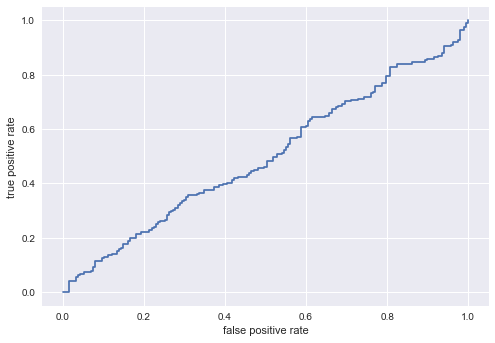

In [35]:
run_logreg(X_train_count, X_test_count, y_train_nextday, y_test_nextday, 'Count', 'Next Day')

<h3> Models predicting Daily change from Open to Close </h3>

Logistic Regression
Vectorizer: tfidf
Outcome Variable: Next Day
accuracy score is: 0.484126984127
Roc/Auc Score is:  0.480009519277


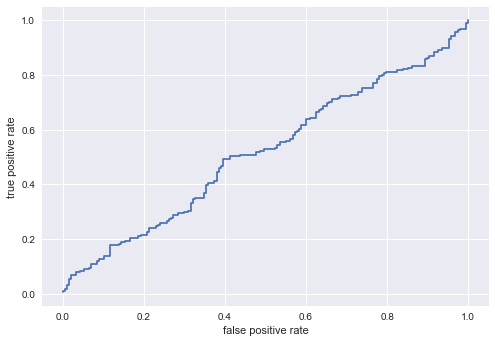

In [36]:
run_logreg(X_train_tfidf, X_test_tfidf, y_train_nextday, y_test_nextday, 'tfidf', 'Next Day')

Logistic Regression
Vectorizer: tfidf - 2
Outcome Variable: Next Day
accuracy score is: 0.505291005291
Roc/Auc Score is:  0.503079765938


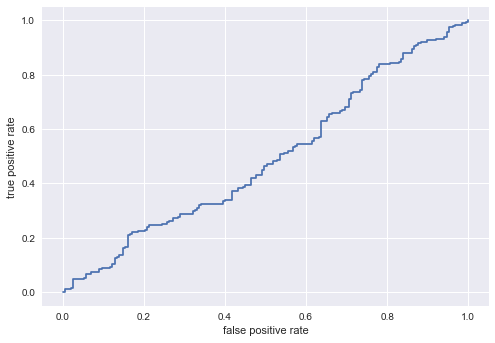

In [37]:
run_logreg(X_train_tfidf2, X_test_tfidf2, y_train_nextday, y_test_nextday, 'tfidf - 2', 'Next Day')

Multinomial Naive Bayes
Vectorizer: Count
Outcome Variable: Next Day
Accuracy score is: 0.505291005291
Roc/Auc Score is:  0.50285578296


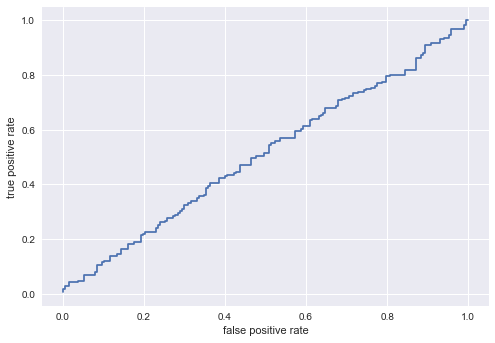

In [38]:
run_multiNB(X_train_count, X_test_count, y_train_nextday, y_test_nextday, 'Count', 'Next Day')

Multinomial Naive Bayes
Vectorizer: tfidf
Outcome Variable: Next Day
Accuracy score is: 0.505291005291
Roc/Auc Score is:  0.5


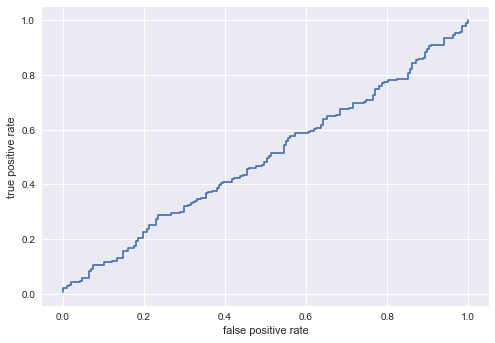

In [39]:
run_multiNB(X_train_tfidf, X_test_tfidf, y_train_nextday, y_test_nextday, 'tfidf', 'Next Day')

Multinomial Naive Bayes
Vectorizer: tfidf - 2
Outcome Variable: Next Day
Accuracy score is: 0.507936507937
Roc/Auc Score is:  0.503737715934


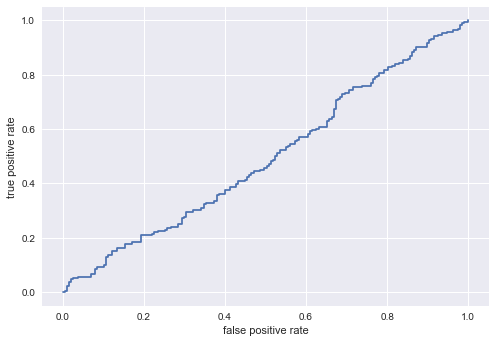

In [40]:
run_multiNB(X_train_tfidf2, X_test_tfidf2, y_train_nextday, y_test_nextday, 'tfidf - 2', 'Next Day')

In [54]:
y_test_labelb = []
for val in y_test_label:
    if val == 0:
        y_test_labelb.append(1)
    else:
        y_test_labelb.append(0)
    
y_train_labelb = []
for val in y_train_label:
    if val == 0:
        y_train_labelb.append(1)
    else:
        y_train_labelb.append(0)

Logistic Regression
Vectorizer: Count
Outcome Variable: Label (Open to Close)
accuracy score is: 0.417989417989
Roc/Auc Score is:  0.417254704301


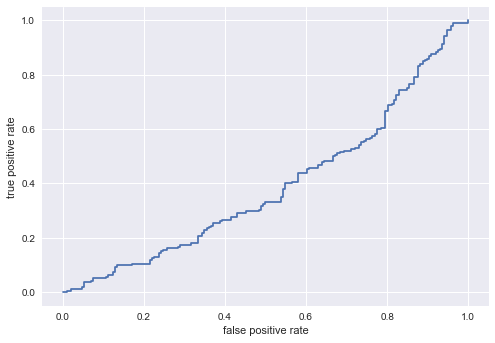

In [57]:
run_logreg(X_train_count, X_test_count, y_train_label, y_test_label, 'Count', 'Label (Open to Close)')



Logistic Regression
Vectorizer: tfidf
Outcome Variable: Label (Open to Close)
accuracy score is: 0.489417989418
Roc/Auc Score is:  0.482442876344


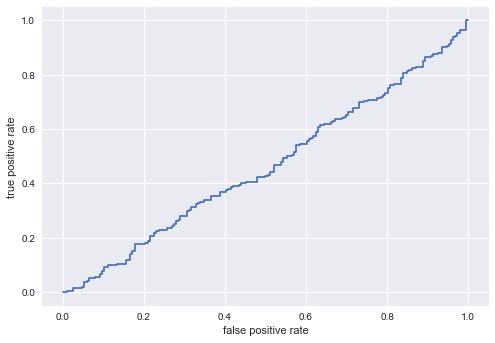

In [43]:
run_logreg(X_train_tfidf, X_test_tfidf, y_train_label, y_test_label, 'tfidf', 'Label (Open to Close)')

Logistic Regression
Vectorizer: tfidf - 2
Outcome Variable: Label (Open to Close)
accuracy score is: 0.560846560847
Roc/Auc Score is:  0.558299731183


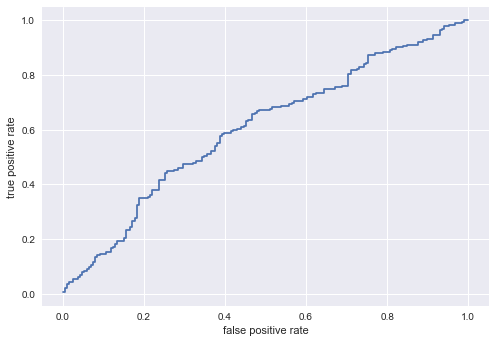

In [44]:
run_logreg(X_train_tfidf2, X_test_tfidf2, y_train_label, y_test_label, 'tfidf - 2', 'Label (Open to Close)')

Multinomial Naive Bayes
Vectorizer: Count
Outcome Variable: Label (Open to Close)
Accuracy score is: 0.492063492063
Roc/Auc Score is:  0.488575268817


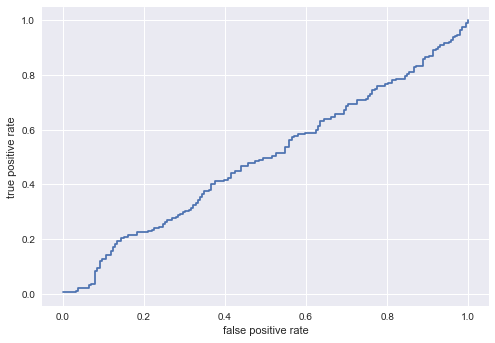

In [45]:
run_multiNB(X_train_count, X_test_count, y_train_label, y_test_label, 'Count', 'Label (Open to Close)')

Multinomial Naive Bayes
Vectorizer: tfidf
Outcome Variable: Label (Open to Close)
Accuracy score is: 0.507936507937
Roc/Auc Score is:  0.5


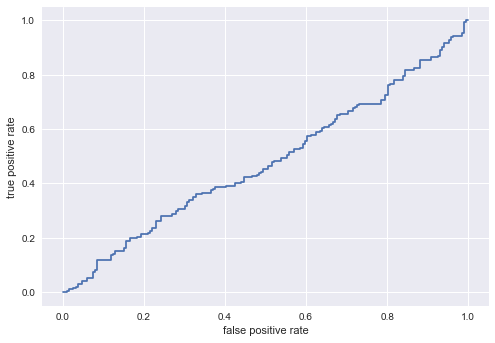

In [46]:
run_multiNB(X_train_tfidf, X_test_tfidf, y_train_label, y_test_label, 'tfidf', 'Label (Open to Close)')

Multinomial Naive Bayes
Vectorizer: tfidf - 2
Outcome Variable: Label (Open to Close)
Accuracy score is: 0.550264550265
Roc/Auc Score is:  0.544858870968


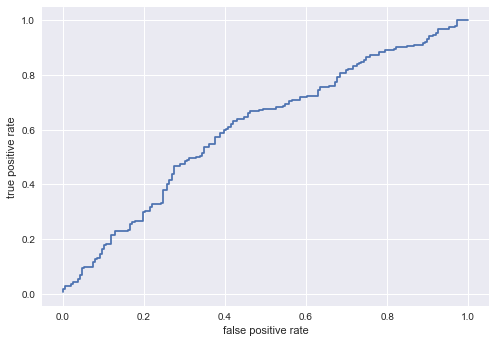

In [47]:
run_multiNB(X_train_tfidf2, X_test_tfidf2, y_train_label, y_test_label, 'tfidf - 2', 'Label (Open to Close)')

<h5> Use a grid search on the best Naive Bayes Model predicting daily open to close </h5>

In [48]:
# gridsearch to try to improve MultiNB model using tfidf - 2 and prediting Label
from sklearn.model_selection import GridSearchCV
multiNB = MultinomialNB()
params = [{'alpha':[0.00001,0.0001,0.001,0.01,0.1,1.0]},
          {'alpha':[0.00001,0.0001,0.001], 'fit_prior':[True,False]}
         ]
grid_search = GridSearchCV(estimator=multiNB,param_grid = params,scoring='accuracy',cv=10)
grid_search = grid_search.fit(X_train_tfidf2, y_train_label)

best_accuracy = grid_search.best_score_
print 'best accuracy: ', best_accuracy
best_params = grid_search.best_params_
print 'best params: ', best_params

best accuracy:  0.537554314091
best params:  {'alpha': 1e-05}


In [49]:
def run_multiNB_hyperparam(X_train, X_test, y_train, y_test, vect_type, outcome_var):
    X_train = X_train.toarray()
    X_test = X_test.toarray()
    
    multiNB = MultinomialNB(alpha=0.00001)
    multiNB = multiNB.fit(X_train, y_train)
    
    y_pred_multi = multiNB.predict(X_test)
    prob_multi = multiNB.predict_proba(X_test)[:,1]
    accuracy_multi = accuracy_score(y_pred_multi, y_test)
    
    print 'Multinomial Naive Bayes post-GridSearch'
    print 'Vectorizer:', vect_type
    print 'Outcome Variable:', outcome_var
    print 'Accuracy score is: ' + str(accuracy_multi)
    print 'Roc/Auc Score is: ', roc_auc_score(y_test,y_pred_multi)
    fpr, tpr, _ = roc_curve(y_test, prob_multi) 
    
    plt.plot(fpr,tpr)
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.show()
    
    return pd.crosstab(y_test,y_pred_multi,rownames=['actual'],colnames=['pred'])
    

Multinomial Naive Bayes
Vectorizer: tfidf - 2
Outcome Variable: Label (Open to Close)
Accuracy score is: 0.550264550265
Roc/Auc Score is:  0.544858870968


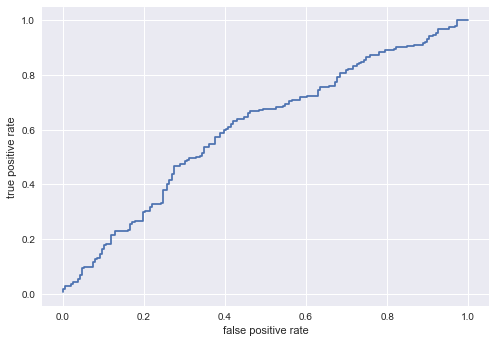

Multinomial Naive Bayes post-GridSearch
Vectorizer: tfidf - 2
Outcome Variable: Label (Open to Close)
Accuracy score is: 0.563492063492
Roc/Auc Score is:  0.558719758065


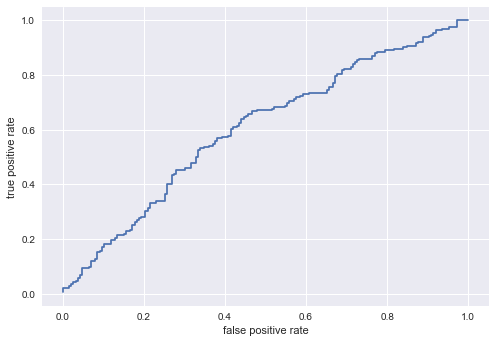

pred,0,1
actual,,
0,48,138
1,27,165


In [50]:
run_multiNB(X_train_tfidf2, X_test_tfidf2, y_train_label, y_test_label, 'tfidf - 2', 'Label (Open to Close)')
from sklearn.metrics import confusion_matrix
conf_matrix = run_multiNB_hyperparam(X_train_tfidf2, X_test_tfidf2, y_train_label, y_test_label, 'tfidf - 2', 'Label (Open to Close)')
conf_matrix